In [3]:
"""Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

For MLR assignments your work is good.
Your model building and evaluation metrics are good.
Implement model validation techniques like multicollinearity,
residual analysis and model deletion techniques like cooks distance,
leverage cutoff.Build the final model after these steps and calculate r-squared value.
Resubmit MLR assignments on both datasets"""


'Prepare a prediction model for profit of 50_startups data.\nDo transformations for getting better predictions of profit and\nmake a table containing R^2 value for each prepared model.\n\nR&D Spend -- Research and devolop spend in the past few years\nAdministration -- spend on administration in the past few years\nMarketing Spend -- spend on Marketing in the past few years\nState -- states from which data is collected\nProfit  -- profit of each state in the past few years\n\nFor MLR assignments your work is good.\nYour model building and evaluation metrics are good.\nImplement model validation techniques like multicollinearity,\nresidual analysis and model deletion techniques like cooks distance,\nleverage cutoff.Build the final model after these steps and calculate r-squared value.\nResubmit MLR assignments on both datasets'

In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
#Data Transformation
#Label_Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["State"] = LE.fit_transform(df["State"])

#std Scaler
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df.iloc[:, 0:2]= ss.fit_transform(df.iloc[:, 0:2])
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,471784.10,2,192261.83
1,1.955860,1.082807,443898.53,0,191792.06
2,1.754364,-0.728257,407934.54,1,191050.39
3,1.554784,-0.096365,383199.62,2,182901.99
4,1.504937,-1.079919,366168.42,1,166187.94
5,1.279800,-0.776239,362861.36,2,156991.12
6,1.340066,0.932147,127716.82,0,156122.51
7,1.245057,0.871980,323876.68,1,155752.60
8,1.030369,0.986952,311613.29,2,152211.77
9,1.091819,-0.456640,304981.62,0,149759.96


In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [7]:
Y = df[["Profit"]]
X1 = df[["R&D Spend","Administration"]]
X2 = df[["Administration","Marketing Spend"]]
X3 = df[["Administration"]]
X4 = df[["R&D Spend"]]
X5 = df[["Marketing Spend"]]

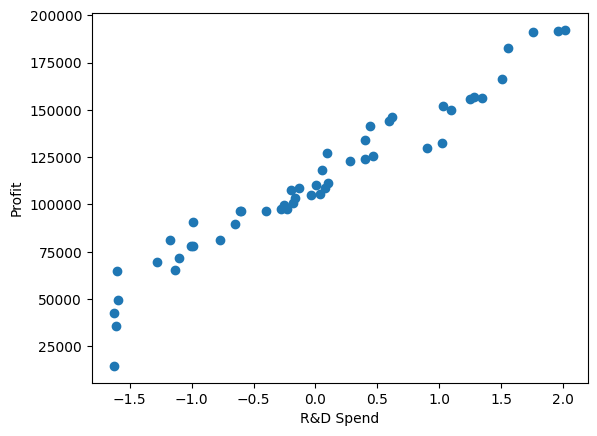

,R&D Spend,Profit
R&D Spend,1.0000,0.9729
Profit,0.9729,1.0000


In [8]:
import matplotlib.pyplot as plt 
plt.scatter(df[["R&D Spend"]],Y) 
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()
df[["R&D Spend", "Profit"]].corr() #Kind of relation

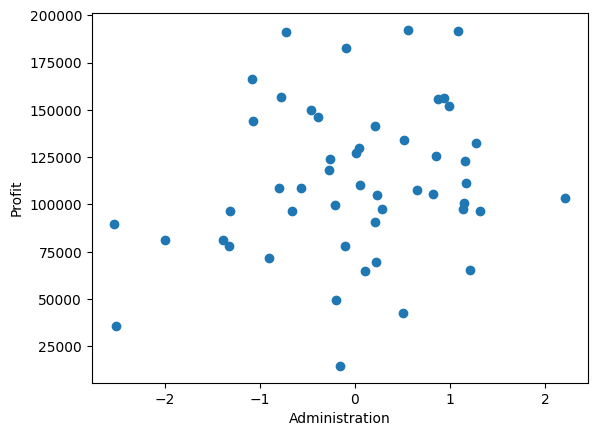

,R&D Spend,Profit
R&D Spend,1.0000,0.9729
Profit,0.9729,1.0000


In [9]:
import matplotlib.pyplot as plt 
plt.scatter(df[["Administration"]],Y) 
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()
df[["R&D Spend", "Profit"]].corr() #Kind of relation

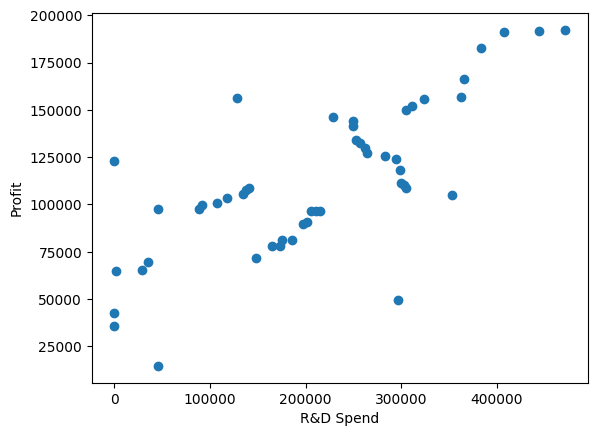

,R&D Spend,Profit
R&D Spend,1.0000,0.9729
Profit,0.9729,1.0000


In [10]:
import matplotlib.pyplot as plt 
plt.scatter(df[["Marketing Spend"]],Y) 
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()
df[["R&D Spend", "Profit"]].corr() #Kind of relation

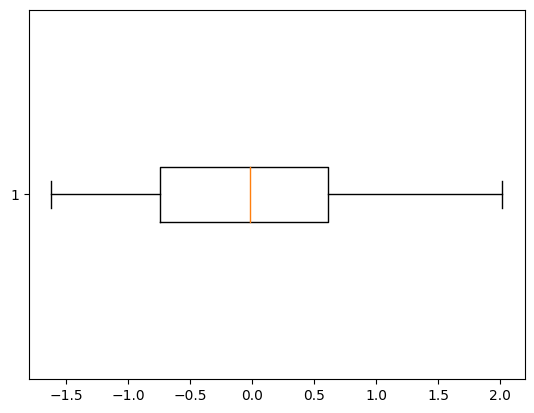

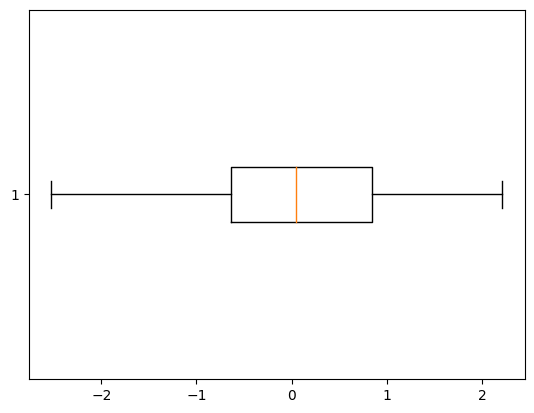

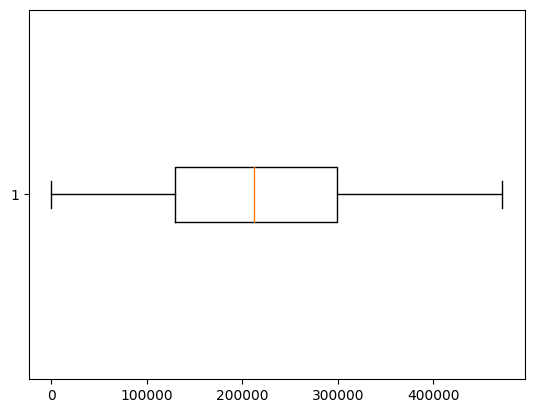

In [11]:
plt.boxplot(df["R&D Spend"], vert = False)
plt.show()
plt.boxplot(df["Administration"], vert = False)
plt.show()
plt.boxplot(df["Marketing Spend"], vert = False)
plt.show()

In [14]:
X1 = np.c_[X1]
X2 = np.c_[X2]
X3 = np.c_[X3]
X4 = np.c_[X4]
X5 = np.c_[X5]

In [15]:


#Stats Models
# Check the Pvalues 
import statsmodels.formula.api as smf
model = smf.ols("Y~X1", data = df).fit()
print(model.summary())
print("Rsq =",model.rsquared)
print("Rsq Adj = ",model.rsquared_adj)#Rsq Adj =  0.9455922124796797
mse = model.mse_model
print("MSE =", mse)
print("RMSE =",np.sqrt(mse).round(2))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           7.29e-31
Time:                        17:08:13   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   1329.588     84.246      0.0

In [16]:


#Stats Models
# Check the Pvalues 
import statsmodels.formula.api as smf
model = smf.ols("Y~X2", data = df).fit()
print(model.summary())
print("Rsq =",model.rsquared)
print("Rsq Adj = ",model.rsquared_adj)#Rsq Adj =  0.593115441684601 ,RMSE = 155783.32
mse = model.mse_model
print("MSE =", mse)
print("RMSE =",np.sqrt(mse).round(2))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.50e-10
Time:                        17:08:14   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.95e+04   7309.722      8.140      0.0

In [17]:


#Stats Models
# Check the Pvalues 
import statsmodels.formula.api as smf
model = smf.ols("Y~X3", data = df).fit()
print(model.summary())
print("Rsq =",model.rsquared)
print("Rsq Adj = ",model.rsquared_adj)#Rsq Adj =  0.020293122877105274, RMSE = 56630.83
mse = model.mse_model
print("MSE =", mse)
print("RMSE =",np.sqrt(mse).round(2))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 18 Jan 2024   Prob (F-statistic):              0.162
Time:                        17:08:14   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   5642.021     19.853      0.0

In [18]:


#Stats Models
# Check the Pvalues 
import statsmodels.formula.api as smf
model = smf.ols("Y~X4", data = df).fit()
print(model.summary())
print("Rsq =",model.rsquared)
print("Rsq Adj = ",model.rsquared_adj)#Rsq Adj =  0.9454214684987816, RMSE = 274497.31
mse = model.mse_model
print("MSE =", mse)
print("RMSE =",np.sqrt(mse).round(2))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           3.50e-32
Time:                        17:08:18   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   1331.673     84.114      0.0

In [19]:


#Stats Models
# Check the Pvalues 
import statsmodels.formula.api as smf
model = smf.ols("Y~X5", data = df).fit()
print(model.summary())
print("Rsq =",model.rsquared)
print("Rsq Adj = ",model.rsquared_adj)#Rsq Adj =  0.5499692740826254 , RMSE = 210977.06
mse = model.mse_model
print("MSE =", mse)
print("RMSE =",np.sqrt(mse).round(2))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           4.38e-10
Time:                        17:08:21   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.0

In [20]:
#X1 & X4 has least RMSE and 95% R2Adj score which is best among all other models, so we wil calculate VIF for both the models
import statsmodels.formula.api as smf
x1 = df["R&D Spend"]
x2 = df["Administration"]
model = smf.ols("x1~x2", data = df).fit()
model.summary()
model.rsquared

VIF = 1/(1-model.rsquared)
print("VIF", VIF)
#X1 has more r squared adjusted value so we'll finalize model X1 
#But as we can see there are only 3 features/X variables, so instead of (excluding them/loosing the data) we will go for residual analysis  

VIF 1.0621826590281835


In [21]:
X = df[["R&D Spend", "Administration", "Marketing Spend"]]
Y = df[["Profit"]]

In [22]:
#Stats Models
# Check the Pvalues 
import statsmodels.formula.api as smf
model = smf.ols("Y~X", data = df).fit()
print(model.summary())
print("Rsq =",model.rsquared)
print("Rsq Adj = ",model.rsquared_adj)#Rsq Adj =  0.9475337762901719, RMSE = 158833.21
mse = model.mse_model
print("MSE =", mse)
print("RMSE =",np.sqrt(mse).round(2))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        17:08:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

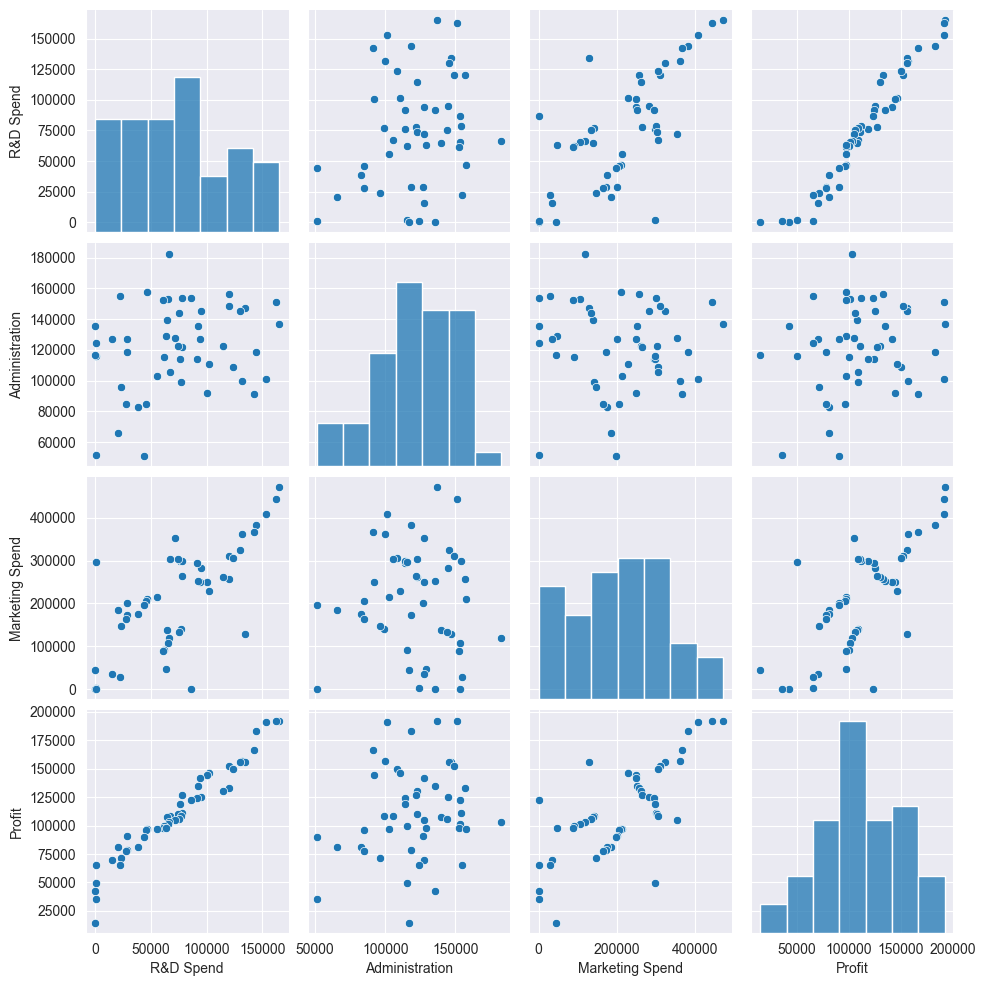

In [23]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(df)

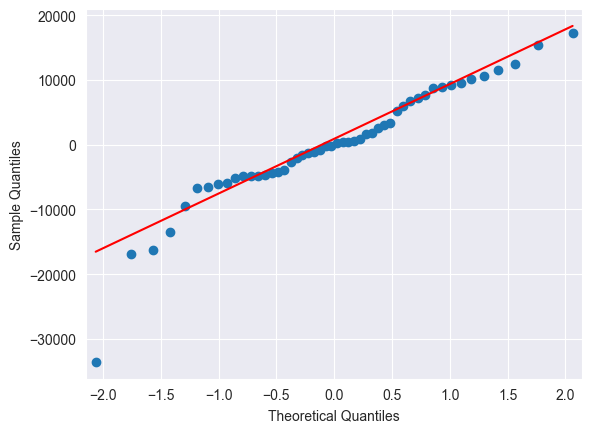

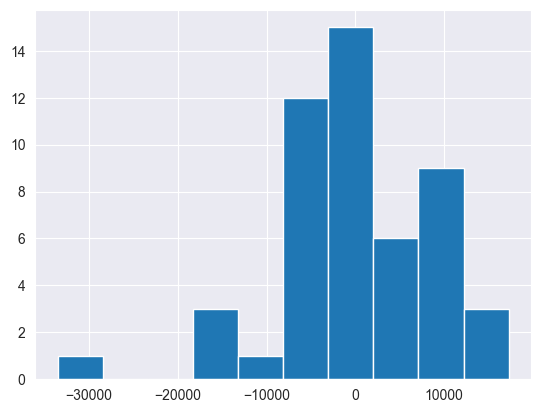

In [24]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line = 'q')
plt.show()

model.resid.hist()
plt.show()


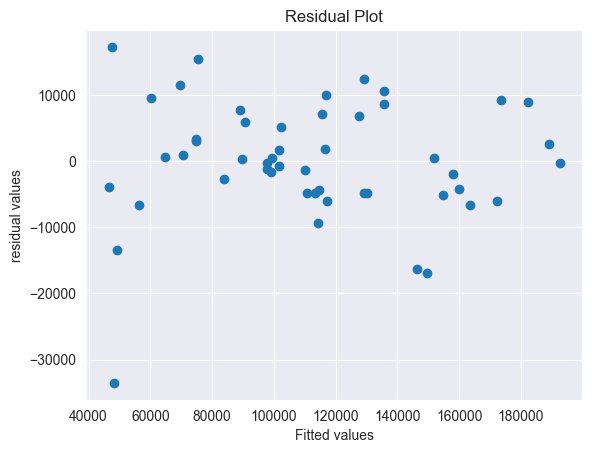

In [25]:
#Scatter plot for Homoscedastisity
model.fittedvalues
model.resid

# no pattern no issues
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('residual values')
plt.show()



In [26]:
#Cook's Distance 
model_influence = model.get_influence()
(cooks, pvalue) = model_influence.cooks_distance


In [27]:
cooks = pd.DataFrame(cooks)
cooks[0].describe()


count    50.000000
mean      0.022891
std       0.049837
min       0.000009
25%       0.001373
50%       0.004441
75%       0.020875
max       0.288082
Name: 0, dtype: float64

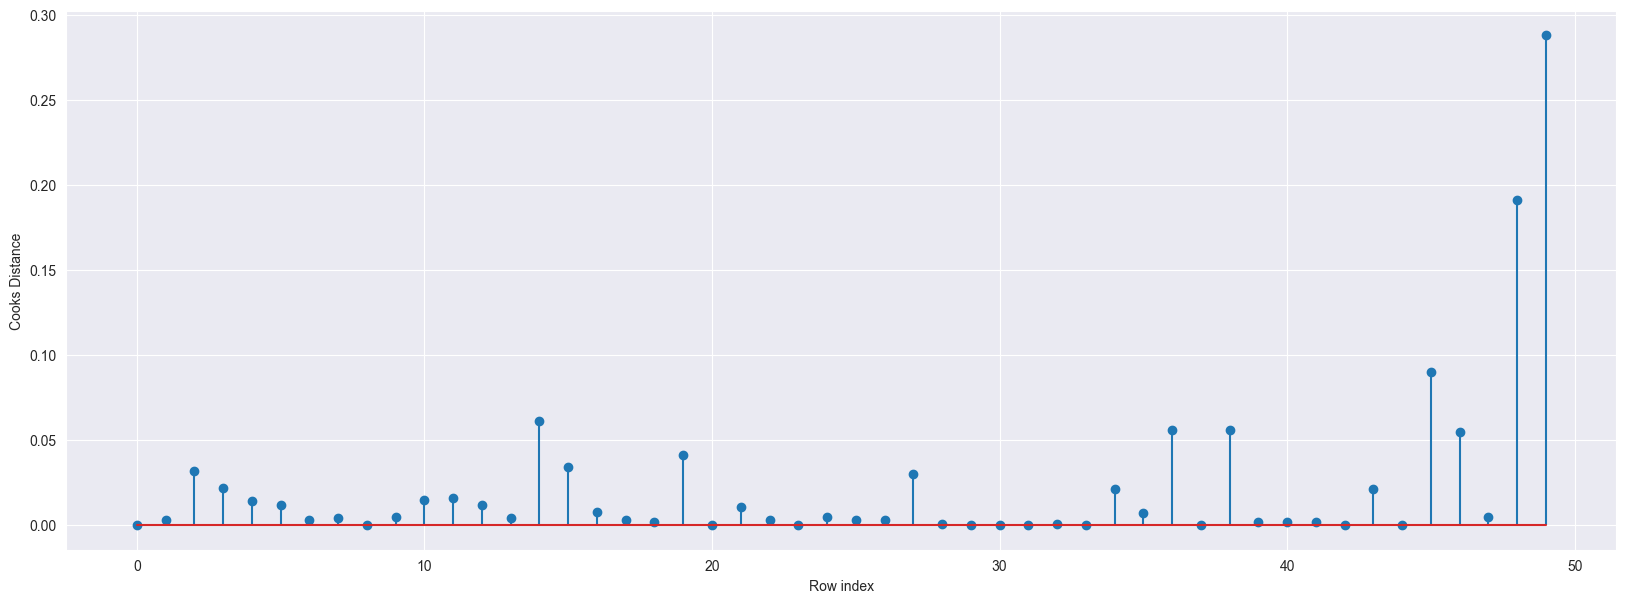

In [28]:
#Plot the influencers values using stem plot
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(cooks[0], 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

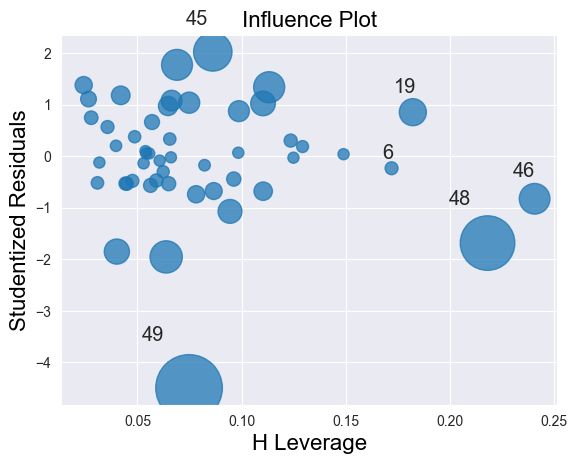

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()


In [30]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [31]:
cooks[0][cooks[0]>leverage_cutoff]


df.drop([48,49], inplace = True)


In [32]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
X = df[["R&D Spend", "Administration", "Marketing Spend"]]
Y = df[["Profit"]]


In [34]:
#Stats Models
# Check the Pvalues 
import statsmodels.formula.api as smf
model = smf.ols("Y~X", data = df).fit()
print(model.summary())
print("Rsq =",model.rsquared)
print("Rsq Adj = ",model.rsquared_adj)#Rsq Adj =  0.960131840917776, RMSE = 142943.84

mse = model.mse_model
print("MSE =", mse)
print("RMSE =",np.sqrt(mse).round(2))
#Performance upgraded

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.03e-31
Time:                        17:08:39   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.0